#### Это сценарий для набора данных COWC

In [1]:
import sys
sys.path.append('../')

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = [15.0, 15.0]

In [3]:
from cropper.core import tilinig_image_and_img_annotation as tile, create_yolo_annotation_from_img_annotation as to_yolo, split_dataset, plot_img_and_boxes
from cropper.utils_img import get_sorted_img_path, get_img_couple
from cropper.utils_img import *
from cropper.utils_core import txt_annotation_to_numpy

In [4]:
dir_path = '../../exp_del/'
path_img = dir_path+'data/'
req_size = (416,416)
overlap = 30 # in pixels
destination_path = dir_path + '/crops_416_416'

In [5]:
# функция нарезания изображений работает по одной картинке. => необходимо создать список путей до картинок
path_img_list = get_sorted_img_path(path_img, ['png'])
path_img_list

['../../exp_del/data/top_potsdam_2_10_RGB.png',
 '../../exp_del/data/top_potsdam_2_10_RGB_Annotated_Cars.png',
 '../../exp_del/data/top_potsdam_2_11_RGB.png',
 '../../exp_del/data/top_potsdam_2_11_RGB_Annotated_Cars.png']

In [6]:
# каждое изображение обрабатывается отдельно. обработка всех изображений - цикл по списку изображений 
scale_dict_base = {}
for path_img_sample in path_img_list:
    path_crop_dir,path_crop_img, path_crop_ann, scale_dict = \
    tile(dir_path, path_img_sample, req_size, overlap, scale_crop = True, save_img_trashold = 0.3, 
         destination_path=destination_path, annotation_prefix= '_Annotated_Cars')
    # так как изображение обрабатывается одно за раз, а для создания yolo текстовых аннотаций передаем все файлы изображений и аннотаций, необходимо накапливать
    # словарь scale_dict
    scale_dict_base.update(scale_dict)
    # path_crop_dir - путь к дирректории, где сохранены тайлы, содержит 2 папки - аннотации и кропы изображений
    # path_crop_img - путь к дирректории где сохранены только кропы изображений

Для создания аннотаций из аннотированных изображений необходимо составить список пар изображение/изображение_аннотация

In [7]:
# составление списка пар изображение/аннотация из дирректории, куда помещены тайлы исходных изображений
img_couple_list = get_img_couple(path_crop_dir, ['png'])
print('Number of couple image/annotation: ', len(img_couple_list))

Number of couple image/annotation:  72


In [8]:
# посмотрим на первые 3 элемента списка
img_couple_list[:3]

[['top_potsdam_2_10_RGB_CROP_1.png',
  'top_potsdam_2_10_RGB_CROP_1_Annotated_Cars.png'],
 ['top_potsdam_2_10_RGB_CROP_2.png',
  'top_potsdam_2_10_RGB_CROP_2_Annotated_Cars.png'],
 ['top_potsdam_2_10_RGB_CROP_3.png',
  'top_potsdam_2_10_RGB_CROP_3_Annotated_Cars.png']]

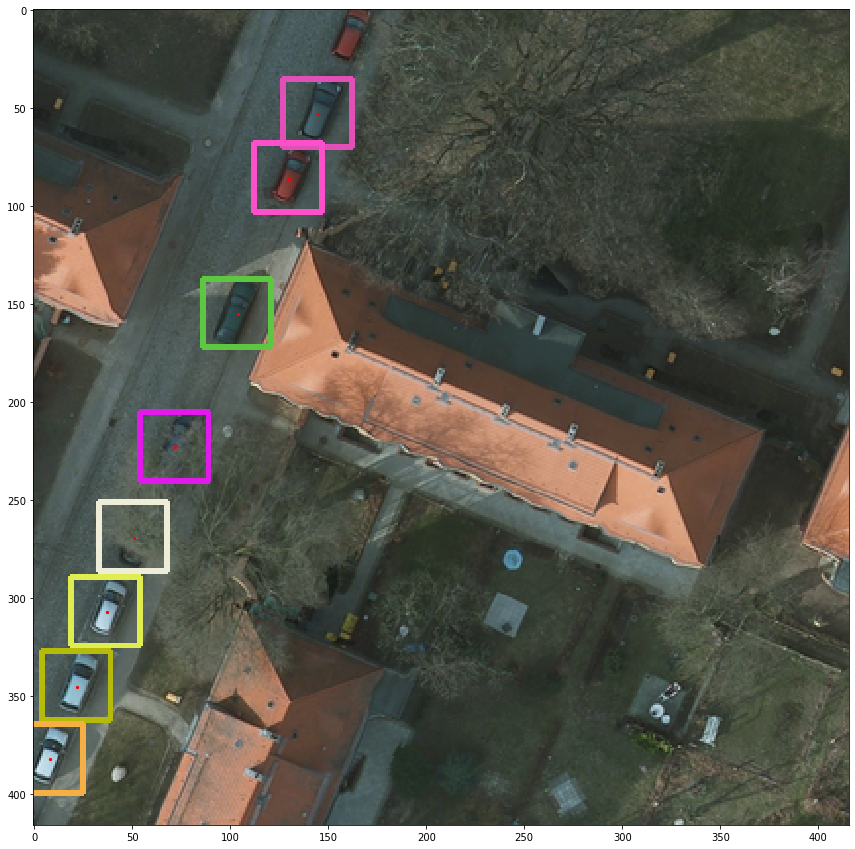

In [9]:
# создание текстовых аннотаций в формате yolo
path_annotation = to_yolo(img_couple_list, path_crop_dir, path_crop_ann, path_crop_img, 
                          annotation_path=path_crop_dir+'/labels', scale_dict = scale_dict, plot_boundingbox = 1)

In [10]:
# разделить набор данных на 2 части, train_part= 0.8 - разделение треин-тест 80/20. и результат сохранить как пути к изображениям в текстовом файле
split_dataset(path_crop_img, ['png'], 0.8, shuffle=True)

количество изображений в train: 57, количество изображений в validation: 15
New folder "/home/vic/PycharmProjects/DS_neuro/Task/detection/MY/exp_del/crops_416_416/img_link_list" created for img_link_list file stores


../cropper/core.py:443: UserWarning: loadtxt: Empty input file: "../../exp_del/crops_416_416/labels/top_potsdam_2_10_RGB_CROP_13.txt"
  ann_txt = np.loadtxt(path_ann)


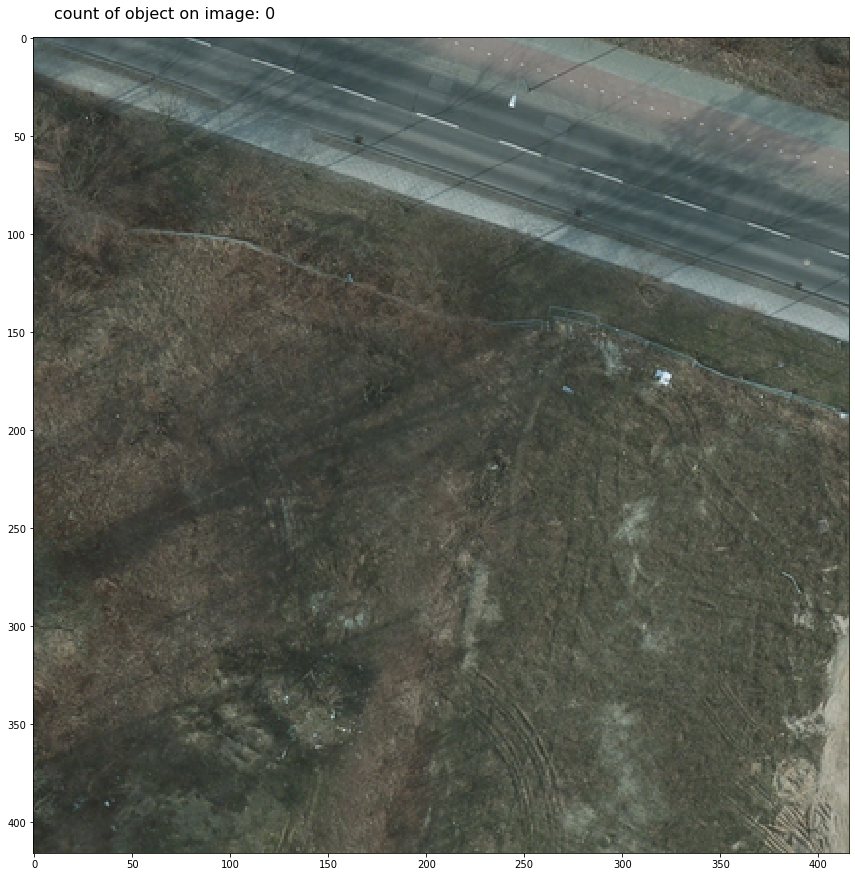

../cropper/core.py:443: UserWarning: loadtxt: Empty input file: "../../exp_del/crops_416_416/labels/top_potsdam_2_11_RGB_CROP_35.txt"
  ann_txt = np.loadtxt(path_ann)


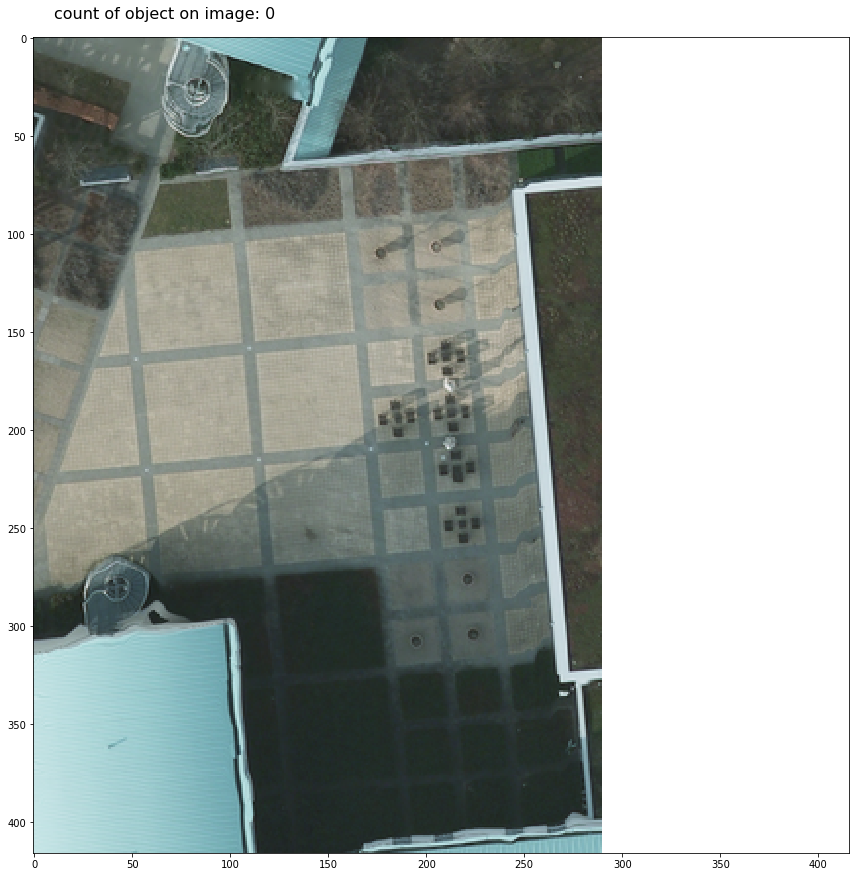

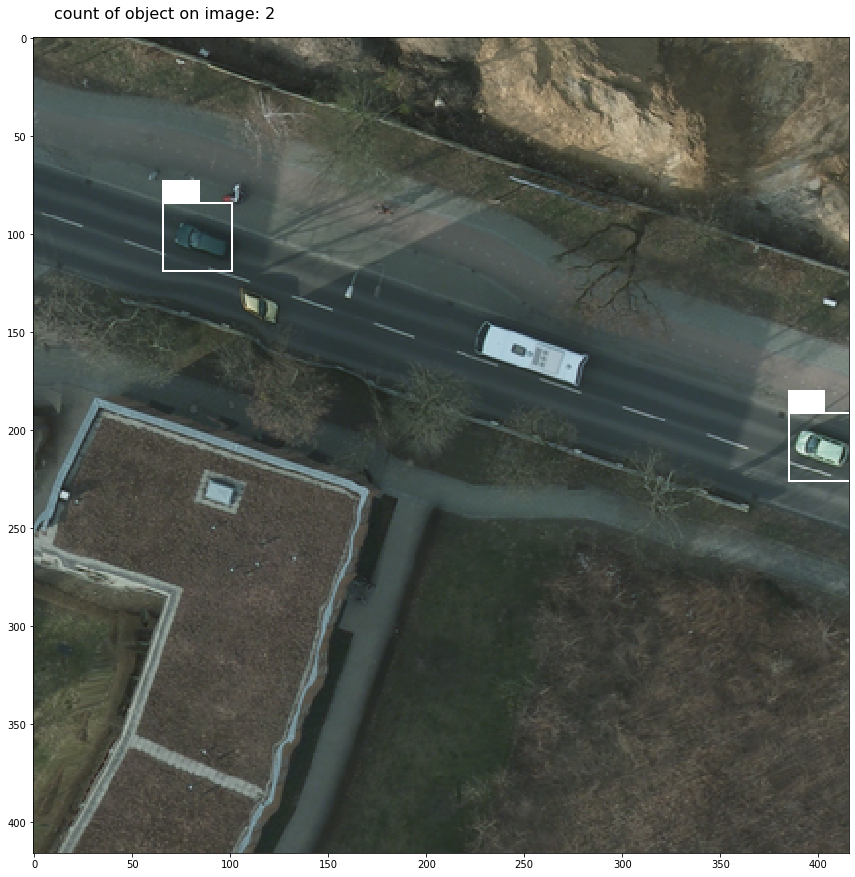

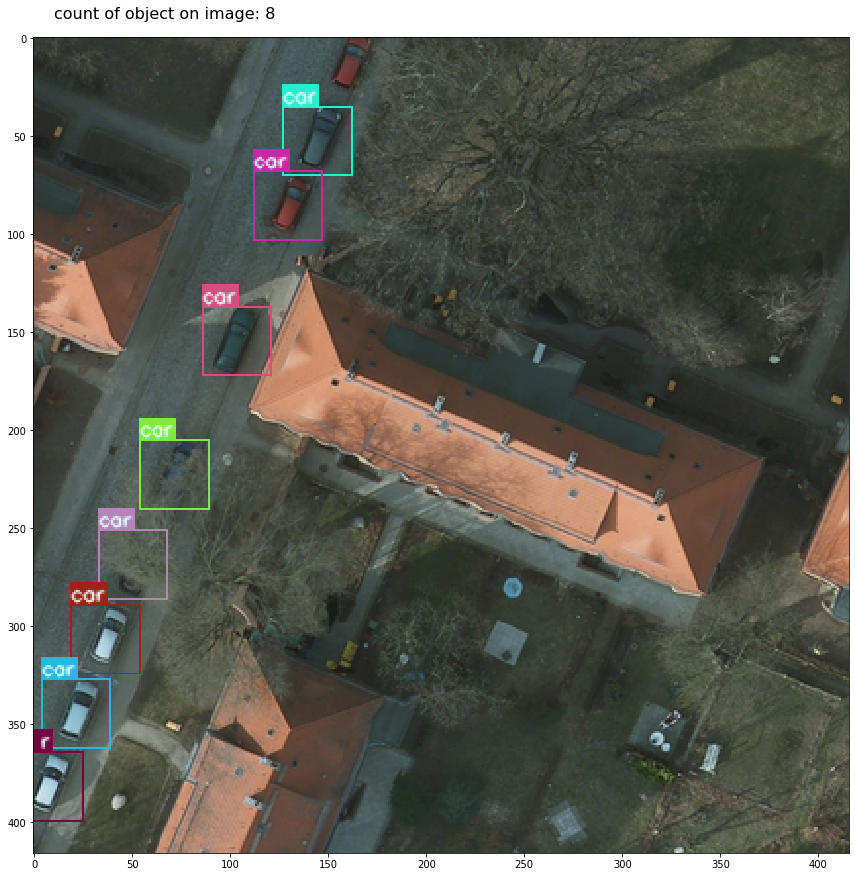

../cropper/core.py:443: UserWarning: loadtxt: Empty input file: "../../exp_del/crops_416_416/labels/top_potsdam_2_10_RGB_CROP_14.txt"
  ann_txt = np.loadtxt(path_ann)


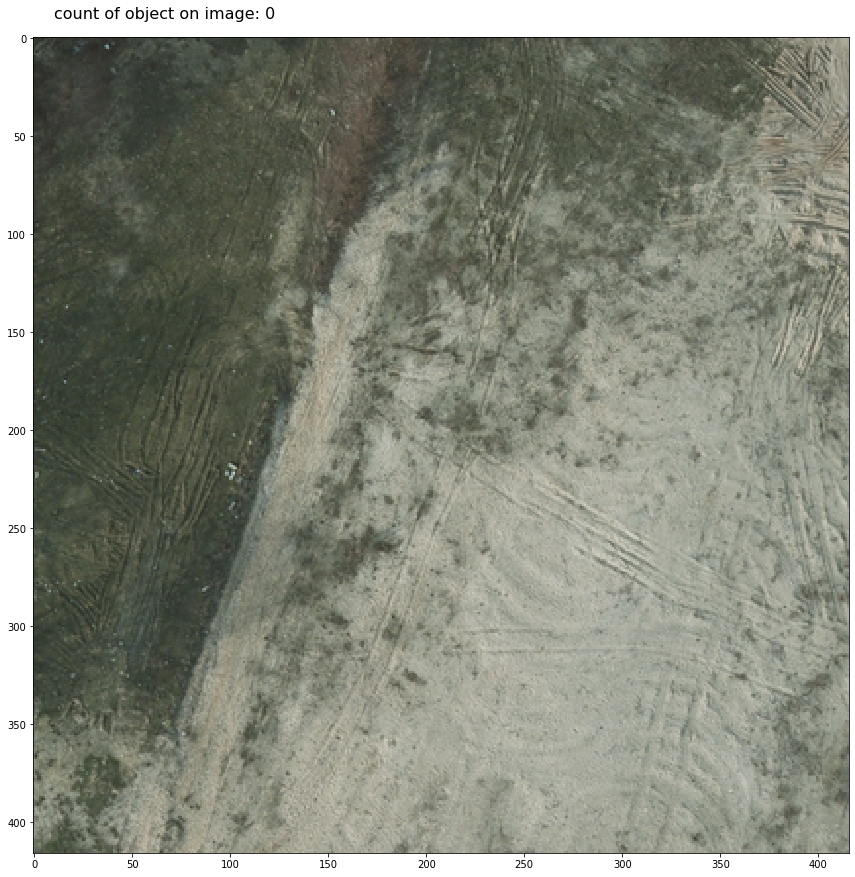

In [11]:
plot_img_and_boxes(path_crop_img, path_annotation, max_plot = 5)